In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import spacy
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/Omdena/LegalAssistance/PII Detection.csv')
print(df.info())
print(df.head(5))

# Check for missing values
#print(df.isnull().sum())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              45000 non-null  object
 1   Credit Card       45000 non-null  object
 2   Email             45000 non-null  object
 3   URL               45000 non-null  object
 4   Phone             45000 non-null  object
 5   Address           45000 non-null  object
 6   Company           45000 non-null  object
 7   SSN               45000 non-null  object
 8   Text              45000 non-null  object
 9   True Predictions  45000 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB
None
               Name                                        Credit Card  \
0      Regina Perez  JCB 15 digit\nPenny Duke\n213117812841877 10/2...   
1      Tiffany

In [ ]:
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Number of records: 45000
Number of features: 10


<Axes: >

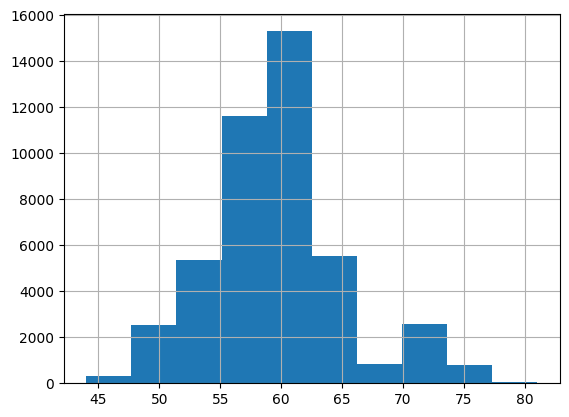

In [ ]:
df['Credit Card'].str.len().hist()

In [ ]:
# Detect Email

email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
df['email_detected'] = df['Email'].apply(lambda x: bool(email_pattern.search(str(x))))
print(df)

                     Name                                        Credit Card  \
0            Regina Perez  JCB 15 digit\nPenny Duke\n213117812841877 10/2...   
1            Tiffany Pham  JCB 16 digit\nRiley King\n3576968162841684 05/...   
2        Alice Williamson  American Express\nGregory Walker\n371735920398...   
3           Patrick Clark  VISA 16 digit\nDaniel Green\n4650631703483823 ...   
4           Autumn Valdez  VISA 13 digit\nBrady Martinez\n4317292063777 0...   
...                   ...                                                ...   
44995        Cindy Murray  VISA 16 digit\nVernon Miles\n4930367669060881 ...   
44996      Michael Briggs  JCB 16 digit\nCarmen Roth\n3540330403257548 02...   
44997          Raven West  VISA 13 digit\nBryan Jackson\n4517990689068 10...   
44998    Mrs. Katie Moody  VISA 16 digit\nSamantha Bauer\n409229300914512...   
44999  Gwendolyn Phillips  JCB 16 digit\nChristina Jefferson\n35925607697...   

                              Email    

In [ ]:
# Detect SSN
ssn_pattern = re.compile(r'\b\d{3}-\d{2}-\d{4}\b')
df['ssn_detected_in_comment'] = df['Text'].apply(lambda x: bool(ssn_pattern.search(str(x))))

print(df)

                     Name                                        Credit Card  \
0            Regina Perez  JCB 15 digit\nPenny Duke\n213117812841877 10/2...   
1            Tiffany Pham  JCB 16 digit\nRiley King\n3576968162841684 05/...   
2        Alice Williamson  American Express\nGregory Walker\n371735920398...   
3           Patrick Clark  VISA 16 digit\nDaniel Green\n4650631703483823 ...   
4           Autumn Valdez  VISA 13 digit\nBrady Martinez\n4317292063777 0...   
...                   ...                                                ...   
44995        Cindy Murray  VISA 16 digit\nVernon Miles\n4930367669060881 ...   
44996      Michael Briggs  JCB 16 digit\nCarmen Roth\n3540330403257548 02...   
44997          Raven West  VISA 13 digit\nBryan Jackson\n4517990689068 10...   
44998    Mrs. Katie Moody  VISA 16 digit\nSamantha Bauer\n409229300914512...   
44999  Gwendolyn Phillips  JCB 16 digit\nChristina Jefferson\n35925607697...   

                              Email    

In [ ]:


df['Name_word_count'] = df['Name'].apply(lambda x: len(str(x).split()))
df['Address_word_count'] = df['Address'].apply(lambda x: len(str(x).split()))
print(df)

                     Name                                        Credit Card  \
0            Regina Perez  JCB 15 digit\nPenny Duke\n213117812841877 10/2...   
1            Tiffany Pham  JCB 16 digit\nRiley King\n3576968162841684 05/...   
2        Alice Williamson  American Express\nGregory Walker\n371735920398...   
3           Patrick Clark  VISA 16 digit\nDaniel Green\n4650631703483823 ...   
4           Autumn Valdez  VISA 13 digit\nBrady Martinez\n4317292063777 0...   
...                   ...                                                ...   
44995        Cindy Murray  VISA 16 digit\nVernon Miles\n4930367669060881 ...   
44996      Michael Briggs  JCB 16 digit\nCarmen Roth\n3540330403257548 02...   
44997          Raven West  VISA 13 digit\nBryan Jackson\n4517990689068 10...   
44998    Mrs. Katie Moody  VISA 16 digit\nSamantha Bauer\n409229300914512...   
44999  Gwendolyn Phillips  JCB 16 digit\nChristina Jefferson\n35925607697...   

                              Email    

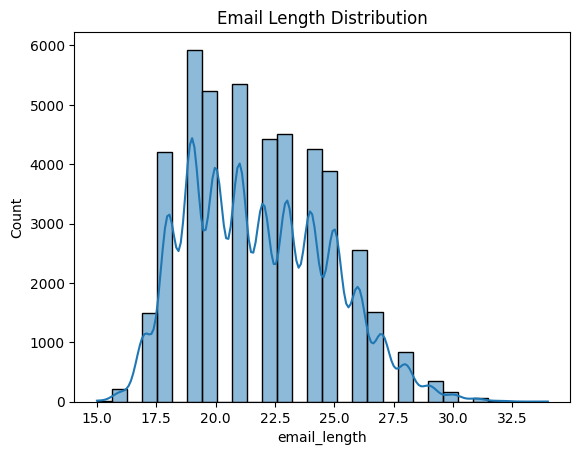

In [ ]:
# Example: Distribution of email length
df['email_length'] = df['Email'].astype(str).apply(len)
sns.histplot(df['email_length'], bins=30, kde=True)
plt.title('Email Length Distribution')
plt.show()

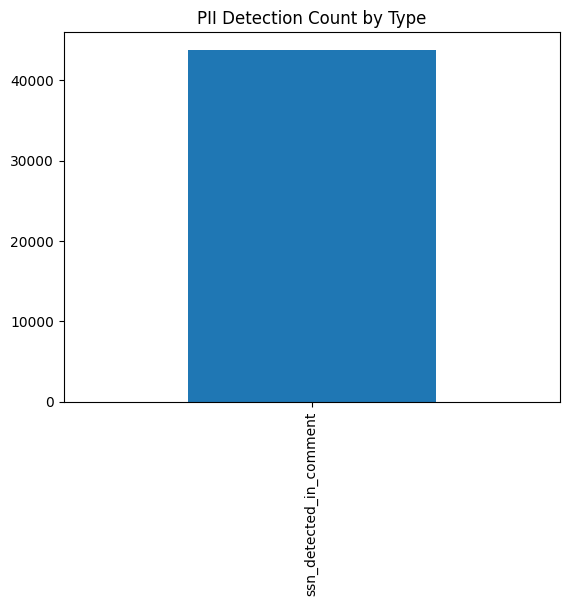

In [ ]:
# Count of PII detections
detected_counts = df[[col for col in df.columns if '_detected' in col]].sum()
detected_counts.plot(kind='bar')
plt.title('PII Detection Count by Type')
plt.show()

In [ ]:
# Example: Anomalies in email length
X = df[['email_length']].fillna(0)
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['email_length_anomaly'] = iso_forest.fit_predict(X)  # -1 = anomaly, 1 = normal


In [ ]:
 #Show anomalies
anomalies = df[df['email_length_anomaly'] == -1]
print("Anomalies detected:\n", anomalies[['Email', 'email_length']])


# 📄 Export Report

# Save anomalies and PII detections
df.to_csv('pii_detection_results.csv', index=False)
print("Report saved as pii_detection_results.csv")

Anomalies detected:
                                   Email  email_length
44       mcfarlandchristina@example.net            30
104    christopherpatterson@example.org            32
396     christopherespinoza@example.org            31
601      katherinehernandez@example.net            30
684                     mle@example.net            15
...                                 ...           ...
44332    christopherramirez@example.net            30
44608    christopherelliott@example.com            30
44636    stephaniearmstrong@example.com            30
44787    contreraskatherine@example.net            30
44926    elizabethblanchard@example.net            30

[260 rows x 2 columns]
Report saved as pii_detection_results.csv


In [ ]:
# ===============================
# 📏 Feature Engineering: Length Analysis
# ===============================
# Assuming columns like 'email' and 'phone' exist (you can adjust names)
df['email_length'] = df['Email'].astype(str).apply(len)
df['phone_length'] = df['Phone'].astype(str).apply(len)

print("Email Length Stats:\n", df['email_length'].describe())
print("Phone Length Stats:\n", df['phone_length'].describe())

# ===============================
# ⚠️ Anomaly Detection: Isolation Forest
# ===============================
# Prepare length features for anomaly detection
X = df[['email_length', 'phone_length']].fillna(0)

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['anomaly_flag'] = iso_forest.fit_predict(X)  # -1 = anomaly, 1 = normal

# List anomalies
anomalies = df[df['anomaly_flag'] == -1]
print("Anomalies detected:\n", anomalies[['Email', 'Phone', 'email_length', 'phone_length']])


Email Length Stats:
 count    45000.000000
mean        21.838600
std          2.947848
min         15.000000
25%         19.000000
50%         22.000000
75%         24.000000
max         34.000000
Name: email_length, dtype: float64
Phone Length Stats:
 count    45000.00000
mean        14.33120
std          0.47065
min         14.00000
25%         14.00000
50%         14.00000
75%         15.00000
max         15.00000
Name: phone_length, dtype: float64
Anomalies detected:
                                   Email            Phone  email_length  \
44       mcfarlandchristina@example.net   +94 7228247446            30   
73                     slin@example.com  +163 8206877266            16   
104    christopherpatterson@example.org  +873 0529925628            32   
225                    mgay@example.net  +182 4458108415            16   
327       michaelpennington@example.com  +591 7771245667            29   
...                                 ...              ...           ...   
44558

In [ ]:
#pip install presidio-analyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 8.0 MB/s eta 0:00:00


In [ ]:
from presidio_analyzer import AnalyzerEngine
analyzer = AnalyzerEngine()
results = analyzer.analyze(text="This Service Contract between", entities=["Phone"], language="en")
print(results)

ValueError: No matching recognizers were found to serve the request.